In [1]:
#Importing some necessary library functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#this is our original data set.
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [6]:
# In this data we have one categorical col named Car Model so we need to convert it in a numerical col so we can easily apply LR model.
# here we first need to create dummy var to apply One hot encoding for converting categorical to numerical col.
dummy_var = pd.get_dummies(df['Car Model'])
dummy_var

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [7]:
# Joining the original and a dummy variables data frame.
newdf = pd.concat([df,dummy_var],axis='columns')
newdf

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [8]:
newdf = newdf.drop('Car Model',axis='columns')

In [9]:
newdf

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [11]:
# Here we need to drop one of the dummy var col to remove the multicolinearity from our data.
newdf = newdf.drop('Mercedez Benz C class',axis='columns')

In [12]:
newdf

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


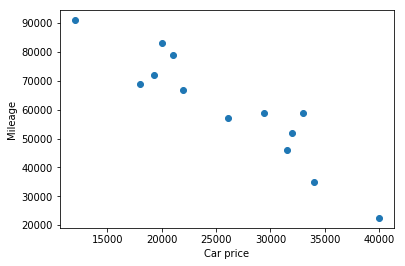

In [17]:
# In this plot we show the relationship between Car price and its Mileage.
# It clearly shows that higher the mileage less will be the price of a car.
plt.xlabel('Car price')
plt.ylabel('Mileage')
plt.scatter(df['Sell Price($)'],df['Mileage'])

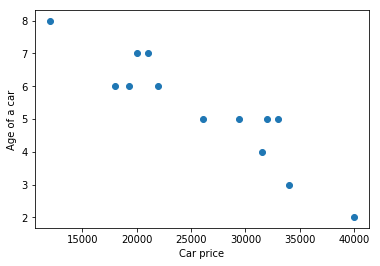

In [29]:
# Similar relation between Price and the age of this car.
plt.xlabel('Car price')
plt.ylabel('Age of a car')
plt.scatter(df['Sell Price($)'],df['Age(yrs)'])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
X = newdf[['Mileage','Age(yrs)','Audi A5','BMW X5']]

In [21]:
y = newdf['Sell Price($)']

In [22]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# We are predicting the price of Audi A5 car so we provide an argument 1 for this col.
lr.predict([[55000,5,1,0]])

array([29504.10190185])

In [27]:
# Score method show the accuracy of our model and here the accuracy of our model is 94%.
lr.score(X,y)

0.9417050937281083